# Intro 

This will be a short exploration of machine learning techniques like Linear Regression, Decision Trees and Random Forests.

The data being used is bike rental data, which can be found 

In [5]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

bike_rentals = pd.read_csv("bike_rental_hour.csv")

bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


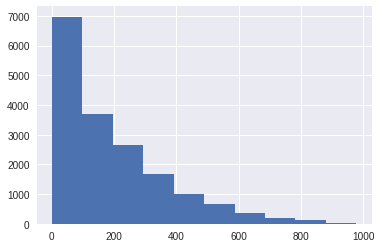

In [10]:
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

plt.hist(bike_rentals['cnt']);

In [14]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

## Calculating Features

In [19]:
def assign_label(num_hour):
    if num_hour in range(6,12):
        return 1
    elif num_hour in range(12,18):
        return 2
    elif num_hour in range(18,24):
        return 3
    else:
        return 4

In [21]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


## Error Metric

Since the data is continuous and the goal of the algorithm will be to perform a type of regression to predict hourly bike rentals, mean squared error or root mean squared error would be good error metrics

## Splitting Train and Test Sets

In [22]:
train = bike_rentals.sample(frac=0.80)

In [23]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

columns = list(train.columns)
columns.remove("cnt")
columns.remove("casual")
columns.remove("registered")
columns.remove("dteday")

lr = LinearRegression()
lr.fit(train[columns], train['cnt'])

predictions = lr.predict(test[columns])

mse = mean_squared_error(test['cnt'], predictions)
rmse = mse ** (1/2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

17738.810780397653

133.18712693198864

Both the mse and rmse are very high, indicating a very poor fit.  This could be because nost days count is very low but there are a couple of days were its unusally high.  Since mse and rmse penalize large error much harder this could be leading to an overall much higher error

## Decision Trees

In [53]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(min_samples_leaf=12, )
tree.fit(train[columns], train['cnt'])

predictions = tree.predict(test[columns])

mse = mean_squared_error(test['cnt'], predictions)
rmse = mse ** (1/2)

mse
rmse

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=12, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

2418.1672107101904

49.17486360642183

The decision tree did a lot better then basic linear regression.  Partly since its more able to take non-linearities into account.  Decisions trees do have a tendancy to over fit however, and adjusting parameters is often necessary to get the best fit 

## Random Forests

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100, n_jobs=100)
forest.fit(train[columns], train['cnt'])

predictions = forest.predict(test[columns])

mse = mean_squared_error(test['cnt'], predictions)
rmse = mse ** (1/2)

mse
rmse

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=100, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

1523.8796794591485

39.03690150945831

The random forest did a fair bit better then a single decision tree, which makes sense.  A random forset is less likely to overfit, and find more likely to find "the signal in the noise"